# From Data Programming to Data Science
The objective of this course to leverage the different data programming concepts we already presented in order to perform analytical tasks for Data Science problems. It can be either a deep analysis or the development of a predictive model.

In this course you will have to solve two tasks. The first one is a task from the Natural Language Processing domain and the second one concerns the analysis of Open Data from the [Inside Airbnb project](http://insideairbnb.com/about.html).

Note that these two task are also the assignments for this course.

## Word Embeddings

Word Embdeddings are vector representations of words/tokens in a vocabulary. To put is simply, these are mappings from words to vectors of real numbers. While word embeddings (or distributed representations of words) have a long history, recent advances allowed the training of word embeddings using large unsupervised corpora (like for example Wikipedia). One of the most of the models that had great impact in the domain was [word2vec](https://en.wikipedia.org/wiki/Word2vec). The idea of this model is to scan the documents with a fixed window and create pairs of words that can be used to train a neural model. The intuition is that by capturing the context of word we can learn good representations. For example, if the words `Greece`, `Italy` and `Europe` appear in the same context then we will expect these words to be semantically close in the embedding space.

The following figure presents schematically the word2vec model. Note that the model is trained by pairs of words where the target word in the input and the context words the output or the ones we try to predict. To put it differently, given a word as input we try to predict what is the probability to have certain words as context. The model is a shallow neural network with one hidden layer.

<img src="images/word2vec.png" width=400>

Another very popular method is GloVe which is a matrix factorization approach trained on the co-occurence matrix. This matrix has the number of times each pair of terms in the collection co-occur (withing a window).



### Assignment on Word Embeddings (30%)
For the assignment you will have to download the GloVe vectors from [here](https://nlp.stanford.edu/projects/glove/). Download the `glove.6B.zip` and then unzip it in an appropriate folder. 

Alternatively, you can use the following snippet to download the GloVe vectors Note that then you need to unzip it and select the version with the 50 dimensional vectors.
```python
#import wget
#wget.download("http://nlp.stanford.edu/data/glove.6B.zip")
```

We will use the `glove.6B.50d.txt` file which contains the word vectors with dimension 50. The file contains a vector per line where the word is in the first column.
```
word 0.13 0.123 1.23 0.1234 ...
word2 -0.102 -1.233 1.01 1.1 ...
```

In this assignment you will have to do the following activities:
- Load the vectors in an appropriate format (you can use float32 to reduce memory print).
- Write a function that takes as argument a word and returns the 20 most similar words by cosine similarity.
- Write a function that takes as arguments a list of words and returns the corresponding vectors in a numpy array. Then use the utility function below to plot the vectors. When testing your code try to use lists of words that contain groups of semantically close words.

In [14]:
# You will need to install the umap-learn package
# In a cell give: !pip install umap-learn
# Use the anaconda package manager for conda environments.
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_embeddings(words,vectors,num_neighbors=2):
    """
    Utility function to do a 2d plot of word-embeddings with annotations.
    
    param words: list of words
    param vectors: array of word embeddings corresponding to the list of words
    param num_neighbors: number of neighbors to consider in the UMAP projection
    """
    # Project the 50d vectors to a 2d space
    V_umap = umap.UMAP(n_neighbors=num_neighbors,min_dist=0.2).fit_transform(vectors)
    
    fig= plt.figure(figsize=(12,6))

    plt.scatter(V_umap[:, 0], V_umap[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(V_umap[i, 0], V_umap[i, 1]))
    plt.show()
    

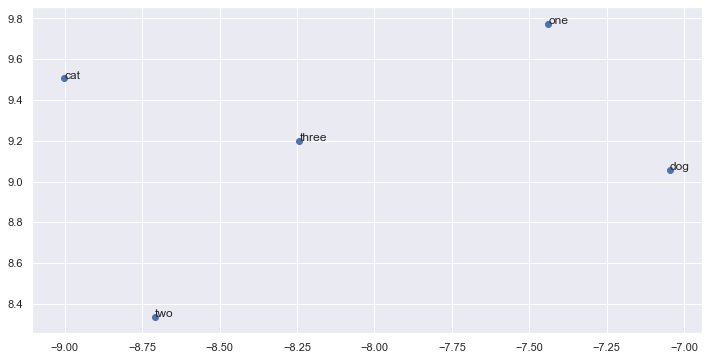

In [15]:
from numpy.random import default_rng
sns.set()
words = ["cat", "dog","one", "two","three"]
# random embeddings just to test the function
rng = default_rng()
embeddings = rng.uniform(size=(len(words),50))

plot_word_embeddings(words,embeddings)

# Inside Airbnb (70%)

In this task you will have to perform an analysis on data from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) project which collects public data from AirBnb. You will be working with a dataset from Amsterdam listings which you will find in the `data` folder. These files have information on the listings as well as reviews. Specifically you will find three files in the data folder:
- listings_Amsterdam.csv.gz, detailed listings data
- listings_Amsterdam_summary.csv.gz, summary data of listings
- reviews_Amsterdam.csv.gz, summary of reviews

In [ ]:
import pandas as pd
listings_amsterdam = pd.read_csv("data/listings_Amsterdam.csv.gz",compression="gzip")

In [ ]:
listings_amsterdam.columns

In [ ]:
listings_summary_Amsterdam = pd.read_csv("data/listings_Amsterdam_summary.csv.gz",compression="gzip")

In [ ]:
listings_summary_Amsterdam

In [ ]:
reviews_amsterdam= pd.read_csv("data/reviews_Amsterdam.csv.gz",compression="gzip")

In [ ]:
reviews_amsterdam

This assignment has two parts. In the first one you will have to complete specific analytic tasks while in the second part you will be able to improvise and present an analysis of the dataset with statistics and appropriate visualizations.

### Part I (40% of the total)
Complete the following activities:

- Calculate how many reviews per year have the listings in total. Plot, the result.
- Plot the number of listings per room-type.
- Plot the number of bookings per property type.
- Plot the average number of reviews per room-type.
- Calculate the total number of bookings per neighborhood and plot the top 10 in decreasing order.
- Find the average number of listings per host and plot the distribution.
- Calculate the total number of reviews for each listing and plot the distribution.
- Calculate the total number of reviews per `instant_bookable` flag.
- Find the 10 most common amenities and the 10 least frequent ones across the listings. Plot their counts.


### Part II (30% of the total) - Open play-ground
In this part you will have to explore the data and perform insightful analytics. You can always use more data from the corresponding [page](http://insideairbnb.com/get-the-data.html) like for example the calendar or even the textual reviews. There is also geographical data for those that would like to do plots on maps.

# References
- https://en.wikipedia.org/wiki/Word_embedding
- https://ruder.io/word-embeddings-1/
- https://nlp.stanford.edu/projects/glove/
- https://en.wikipedia.org/wiki/Word2vec
- http://insideairbnb.com/get-the-data.html